<a href="https://colab.research.google.com/github/thallamsaithrishool/AIML_2303a51127/blob/main/AIML-LAB-08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml



In [5]:
data = fetch_openml('car')
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


In [6]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])


In [7]:
df.describe()


,buying,maint,doors,persons,lug_boot,safety,target
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.700231
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.458289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000


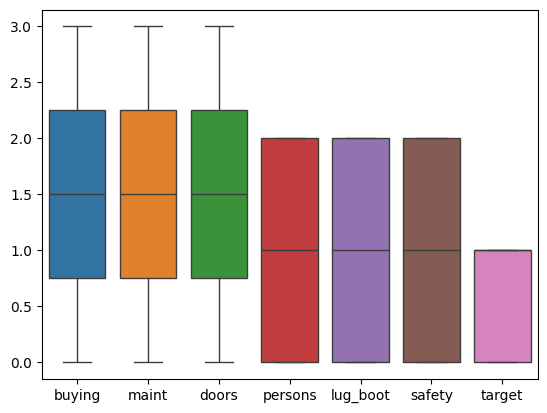

In [8]:
sns.boxplot(data=df.iloc[:, :10])
plt.show()


In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])


In [19]:
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 4, 6, 8, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf':[1,2,4]
}

In [20]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 4, 6, 8, 10],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [21]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Cross-Validation Score: 0.9900757861527383


In [22]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [23]:
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Test Accuracy: 0.9845857418111753
Confusion Matrix:
 [[159   2]
 [  6 352]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.99      0.98      0.99       358

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



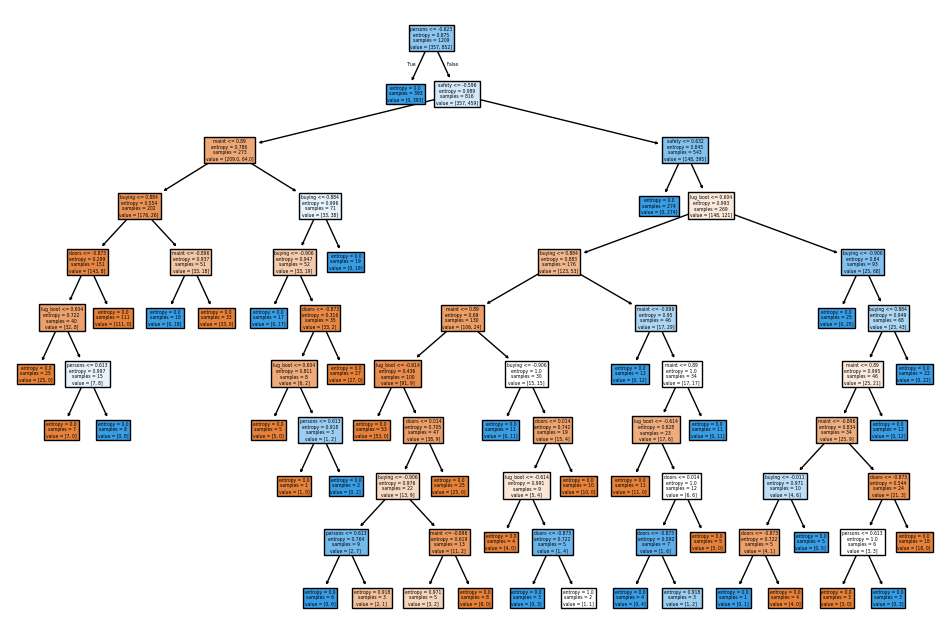

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(grid_search.best_estimator_['clf'], filled=True, feature_names=X.columns)
plt.show()